In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

tf.__version__

'2.0.0'

In [2]:
# Downloading the data, if it does not exist, this will take some time... (>120MB)
import urllib
import os
if not os.path.isfile('8_faces_train_and_valid.hdf5'):
    urllib.request.urlretrieve("https://www.dropbox.com/s/dx03vk6dmbtoywn/8_faces_train_and_valid.hdf5?dl=1","8_faces_train_and_valid.hdf5")

In [3]:
import h5py
h5f_X = h5py.File('8_faces_train_and_valid.hdf5', 'r')
print(list(h5f_X.keys()))
X_train = h5f_X['X_train_8_faces'].value
print(X_train.shape)
Y_train = h5f_X['Y_train_8_faces'].value
print(Y_train.shape)
X_valid = h5f_X['X_valid_8_faces'].value
print(X_valid.shape)
Y_valid = h5f_X['Y_valid_8_faces'].value
print(Y_valid.shape, X_valid.dtype)

['X_train_8_faces', 'X_valid_8_faces', 'Y_train_8_faces', 'Y_valid_8_faces']


D:\Programme\Anaconda3\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


(2000, 48, 48, 3)
(2000,)
(400, 48, 48, 3)
(400,) float64


250


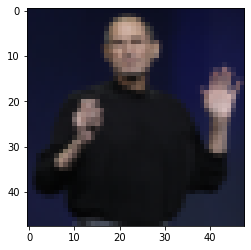

In [4]:
n = 0 #Miranda Cosgrove
n = 1 #Chris Martin (singer)
n = 2 #Emma Stone (actress)
n = 3 #Jamie Foxx (actor)
n = 4 #Steve Jobs (entrepreneur)
n = 5 #Zac Efron (actor)
n = 6 #Sandra Oh (actress)
n = 7 #Taryn Manning (actress)
n = 4 
idx=np.reshape(np.where(Y_train[0:len(Y_train)]==n),(250))
print(len(Y_train[idx]))
plt.imshow(np.asarray(X_train[idx][0],dtype="uint8"))

In [5]:
#Downloading the data, if it does not exist
if not os.path.isfile('8_faces_test.hdf5'):
  urllib.request.urlretrieve("https://www.dropbox.com/s/ugxrdo0lpc2ixvr/8_faces_test.hdf5?dl=1","8_faces_test.hdf5")
h5f_X = h5py.File('8_faces_test.hdf5', 'r')
print(list(h5f_X.keys()))
X_test = h5f_X['X_test_8_faces'].value
print(X_test.shape)
Y_test = h5f_X['Y_test_8_faces'].value
print(Y_test.shape)

['X_test_8_faces', 'Y_test_8_faces']
(400, 48, 48, 3)
(400,)


In [6]:
np.min(X_train),np.max(X_train),np.min(X_test),np.max(X_test)
X_train /= 255
X_valid /= 255
X_test /= 255

<h3>a) Training an CNN from scratch</h3>

Train a model (as shown below) from scratch, using the training data for training and the validation data for validation. For all activations in the hidden layer use the 'ReLU', for the last layer use softmax. Use 3x3 convolutions and use padding = same.

- Plot the learning curves: (epochs vs training loss and validation loss) and epochs vs accuracy.
- Calculate the accuracy on the test set (you should reach an accuracy of about 0.54)
- Calculate the confusion matrix
- Have a look at missclassified examples

Image of the network: https://github.com/ioskn/mldl_htwg/blob/master/uebungen/dl_cnn_faces_net.png

In [7]:
model = Sequential()
model.add(Conv2D(15, kernel_size=(3, 3),activation='relu',padding='SAME',input_shape=(48, 48, 3)))
model.add(Conv2D(15, kernel_size=(3, 3),activation='relu',padding='SAME'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(30, kernel_size=(3, 3),activation='relu',padding='SAME'))
model.add(Conv2D(30, kernel_size=(3, 3),activation='relu',padding='SAME'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 15)        420       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 15)        2040      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 15)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 30)        4080      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 30)        8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 30)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1080)              0

In [9]:
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(X_train, Y_train,
          epochs=10, 
          batch_size=16,
          validation_data=(X_valid, Y_valid))

Train on 2000 samples, validate on 400 samples
Epoch 1/10
2000/2000 [==============================] - 26s 13ms/sample - loss: 1.9186 - accuracy: 0.2495 - val_loss: 1.7283 - val_accuracy: 0.3600
Epoch 2/10
2000/2000 [==============================] - 25s 13ms/sample - loss: 1.6384 - accuracy: 0.3965 - val_loss: 1.5473 - val_accuracy: 0.4400
Epoch 3/10
2000/2000 [==============================] - 25s 13ms/sample - loss: 1.4361 - accuracy: 0.4720 - val_loss: 1.4350 - val_accuracy: 0.5025
Epoch 4/10
2000/2000 [==============================] - 25s 13ms/sample - loss: 1.2246 - accuracy: 0.5530 - val_loss: 1.3113 - val_accuracy: 0.4950
Epoch 5/10
2000/2000 [==============================] - 26s 13ms/sample - loss: 1.1030 - accuracy: 0.6105 - val_loss: 1.2970 - val_accuracy: 0.5125
Epoch 6/10
2000/2000 [==============================] - 25s 13ms/sample - loss: 0.9640 - accuracy: 0.6700 - val_loss: 1.2922 - val_accuracy: 0.5400
Epoch 7/10
2000/2000 [==============================] - 25s 13ms/

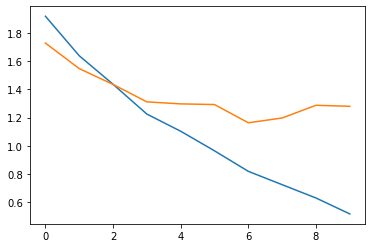

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

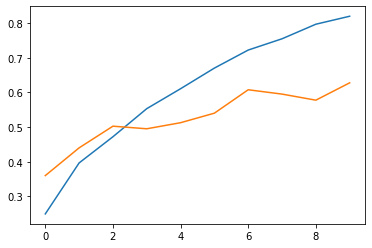

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [13]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0327975964546203
Test accuracy: 0.65


In [14]:
Y_pred = model.predict(X_test)
#Y_pred.shape, Y_test.shape

In [35]:
class_count = len(set(Y_test))
missclassified = []
confusion = np.zeros((class_count, class_count))
for cl in range(Y_test.shape[0]):
    label = Y_test[cl]
    pred = np.argmax(Y_pred[cl])
    confusion[pred,label] += 1
    if pred != label:
        missclassified.append(cl)
print(confusion)

[[40.  0.  1.  3.  0.  0.  4.  2.]
 [ 2. 31.  3.  8.  8. 11.  3. 11.]
 [ 3.  4. 38.  3.  0.  4.  6.  6.]
 [ 0.  3.  1. 26.  1.  3.  1.  1.]
 [ 0.  7.  0.  0. 39.  1.  1.  3.]
 [ 0.  2.  4.  7.  0. 28.  1.  1.]
 [ 3.  1.  0.  1.  1.  2. 32.  0.]
 [ 2.  2.  3.  2.  1.  1.  2. 26.]]


Truth: Jamie Foxx (actor) Prediction: Chris Martin (singer)


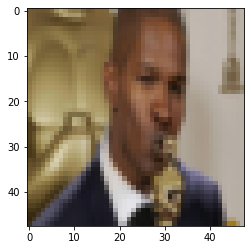

In [53]:
classes = ['Miranda Cosgrove', 
           'Chris Martin (singer)', 
           'Emma Stone (actress)', 
           'Jamie Foxx (actor)', 
           'Steve Jobs (entrepreneur)', 
           'Zac Efron (actor)', 
           'Sandra Oh (actress)', 
           'Taryn Manning (actress)']
mcl = missclassified[0]
print('Truth:',classes[Y_test[mcl]], 'Prediction:', classes[np.argmax(Y_pred[mcl])])
plt.imshow(X_test[mcl])

Truth: Chris Martin (singer) Prediction: Steve Jobs (entrepreneur)


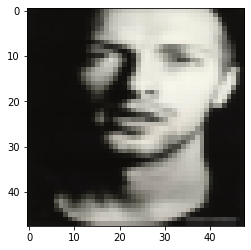

In [52]:
mcl = missclassified[1]
print('Truth:',classes[Y_test[mcl]], 'Prediction:', classes[np.argmax(Y_pred[mcl])])
plt.imshow(X_test[mcl])

Truth: Jamie Foxx (actor) Prediction: Chris Martin (singer)


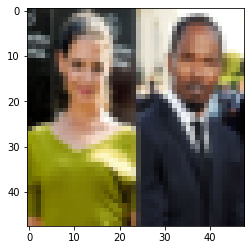

In [54]:
mcl = missclassified[2]
print('Truth:',classes[Y_test[mcl]], 'Prediction:', classes[np.argmax(Y_pred[mcl])])
plt.imshow(X_test[mcl])

Truth: Miranda Cosgrove Prediction: Taryn Manning (actress)


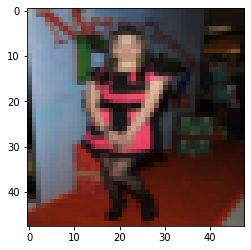

In [55]:
mcl = missclassified[3]
print('Truth:',classes[Y_test[mcl]], 'Prediction:', classes[np.argmax(Y_pred[mcl])])
plt.imshow(X_test[mcl])